## 수집된 데이터의 전처리 및 워드클라우드 맛보기

In [ ]:
!pip install wordcloud
!pip install KoNLPy

In [42]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Okt
from collections import Counter

In [24]:
csv_name = '테슬라_20240101~20240318_10page.csv'
df = pd.read_csv(f'../data/{csv_name}')
df

,뉴스 제목
0,"테슬라, 북미·유럽서 모델Y 가격 100만∼300만원 인상"
1,"""아직도 테슬라 매수 중?""…요즘 서학개미들 몰려든 곳"
2,"""테슬라 다시 한번?""...캐시 우드 등장에 주가 반등"
3,테슬라에도 볕들 날?…캐시우드 매수 등 '호재' [글로벌 뉴스픽]
4,"테슬라, 인종차별 소송 낸 흑인과 합의"
...,...
145,전기차 성장둔화에 美완성차 업체의 전기차 전환도 속도 조절
146,"""테슬라·BYD 게 섰거라""…日 닛산·혼다,전기차 협업 '맞손'"
147,"테슬라 獨베를린 공장, 방화 의심 공격으로 생산 중단"
148,"테슬라 주가 끝모를 역주행…""비중 축소해"" vs ""과도한 하락"""


In [25]:
# C열 (뉴스 제목)의 데이터를 리스트로 가져오기
c_list = df['뉴스 제목'].tolist()
print(c_list)

[' 테슬라, 북미·유럽서 모델Y 가격 100만∼300만원 인상 ', ' "아직도 테슬라 매수 중?"…요즘 서학개미들 몰려든 곳 ', ' "테슬라 다시 한번?"...캐시 우드 등장에 주가 반등 ', " 테슬라에도 볕들 날?…캐시우드 매수 등 '호재' [글로벌 뉴스픽] ", ' 테슬라, 인종차별 소송 낸 흑인과 합의 ', ' 테슬라 승리?…전기차 관세 조건부 인하 ', ' 서학개미 ‘최애’ 주식, 이제 테슬라 아니네 ', " '한파' 맞은 전기차 스타트업…'테슬라 대항마'도 휘청 ", ' 테슬라·BYD 잡는다… 전기차 개발 협력 나선 완성차 업계 ', ' "성장 없는 성장주"…테슬라 끝모를 추락 ', ' [김대호 박사의 오늘 기업·사람] 엔비디아·오라클·애플·테슬라 ', ' 테슬라, 독일공장 확장계획 축소한다… “환경단체 반발” ', " '테슬라 오세요'…인도 투자 유치 그린라이트 ", " [찐코노미] 中 저가 전기차 경쟁 심화?…테슬라 자율주행 성능 폭발시킬 '이것' ", " 멕시코 '올멕 문명' 두상에 깔린 테슬라 차량 [숏폼] ", ' [김대호 박사의 오늘 기업·사람] 엔비디아·오라클·애플·테슬라 ', ' 테슬라, 독일공장 확장계획 축소한다… “환경단체 반발” ', " '테슬라 오세요'…인도 투자 유치 그린라이트 ", " [찐코노미] 中 저가 전기차 경쟁 심화?…테슬라 자율주행 성능 폭발시킬 '이것' ", " 멕시코 '올멕 문명' 두상에 깔린 테슬라 차량 [숏폼] ", ' 美연구소 "테슬라 등 부분자율주행 11개 안전평가 \'나쁨\'" ', ' "테슬라, 머스크 바꿔야 주가 급락 막아" ', ' 테슬라, 소프트웨어 업데이트..‘지능형 전조등’ 변신! ', ' “피스커 파산하면 테슬라가 가장 큰 이득 볼 것” ', " [휴머노이드 기술전쟁]테슬라 옵티머스 첫 과제는 '손'..AI 결합으로 인간 닮아가는 로봇 ", ' "저가 테슬라 100만대 양산 시점 2026년→2027년으로 늦어질듯" ', ' "가격이 또 올라?" 테슬라, 북미·유럽서 \'모델 Y\' 가격

In [26]:
# 리스트를 하나의 벡터 자료로 합치기
vector = ' '.join(c_list)
print(f'vector: {vector}')

okt = Okt()
nouns = okt.nouns(vector)
print(f'nouns(형태소 분석 후): {nouns}')

vector:  테슬라, 북미·유럽서 모델Y 가격 100만∼300만원 인상   "아직도 테슬라 매수 중?"…요즘 서학개미들 몰려든 곳   "테슬라 다시 한번?"...캐시 우드 등장에 주가 반등   테슬라에도 볕들 날?…캐시우드 매수 등 '호재' [글로벌 뉴스픽]   테슬라, 인종차별 소송 낸 흑인과 합의   테슬라 승리?…전기차 관세 조건부 인하   서학개미 ‘최애’ 주식, 이제 테슬라 아니네   '한파' 맞은 전기차 스타트업…'테슬라 대항마'도 휘청   테슬라·BYD 잡는다… 전기차 개발 협력 나선 완성차 업계   "성장 없는 성장주"…테슬라 끝모를 추락   [김대호 박사의 오늘 기업·사람] 엔비디아·오라클·애플·테슬라   테슬라, 독일공장 확장계획 축소한다… “환경단체 반발”   '테슬라 오세요'…인도 투자 유치 그린라이트   [찐코노미] 中 저가 전기차 경쟁 심화?…테슬라 자율주행 성능 폭발시킬 '이것'   멕시코 '올멕 문명' 두상에 깔린 테슬라 차량 [숏폼]   [김대호 박사의 오늘 기업·사람] 엔비디아·오라클·애플·테슬라   테슬라, 독일공장 확장계획 축소한다… “환경단체 반발”   '테슬라 오세요'…인도 투자 유치 그린라이트   [찐코노미] 中 저가 전기차 경쟁 심화?…테슬라 자율주행 성능 폭발시킬 '이것'   멕시코 '올멕 문명' 두상에 깔린 테슬라 차량 [숏폼]   美연구소 "테슬라 등 부분자율주행 11개 안전평가 '나쁨'"   "테슬라, 머스크 바꿔야 주가 급락 막아"   테슬라, 소프트웨어 업데이트..‘지능형 전조등’ 변신!   “피스커 파산하면 테슬라가 가장 큰 이득 볼 것”   [휴머노이드 기술전쟁]테슬라 옵티머스 첫 과제는 '손'..AI 결합으로 인간 닮아가는 로봇   "저가 테슬라 100만대 양산 시점 2026년→2027년으로 늦어질듯"   "가격이 또 올라?" 테슬라, 북미·유럽서 '모델 Y' 가격 100~300만원 인상   [뉴스새벽배송]FOMC 앞둔 美 증시 일제히 하락…푸틴 5선 확정   테슬라 주가 '업치락 뒤치락' 서학개미

nouns(형태소 분석 후): ['테슬라', '북미', '유럽', '모델', '가격', '인상', '테슬라', '매수', '중', '요즘', '서학', '개미', '곳', '테슬라', '다시', '한번', '캐시', '우드', '등장', '주가', '반등', '테슬라', '볕', '날', '캐시', '우드', '매수', '등', '호재', '글로벌', '뉴스', '픽', '테슬라', '인종차별', '소송', '흑인', '합의', '테슬라', '승리', '전기차', '관세', '조건', '부', '인하', '서학', '개미', '최애', '주식', '이제', '테슬라', '한파', '전기차', '스타트업', '테슬라', '대항', '마', '도', '테슬라', '전기차', '개발', '협력', '나선', '완성', '차', '업계', '성장', '장주', '테슬라', '끝', '추락', '김대호', '박사', '오늘', '기업', '사람', '엔비디아', '오라클', '애플', '테슬라', '테슬라', '독일', '공장', '확장', '계획', '축소', '환경', '단체', '반발', '테슬라', '인도', '투자', '유치', '그린', '라이트', '코', '노미', '저가', '전기차', '경쟁', '심화', '테슬라', '자율', '주행', '성능', '폭발', '것', '멕시코', '올멕', '문명', '두상', '테슬라', '차량', '숏폼', '김대호', '박사', '오늘', '기업', '사람', '엔비디아', '오라클', '애플', '테슬라', '테슬라', '독일', '공장', '확장', '계획', '축소', '환경', '단체', '반발', '테슬라', '인도', '투자', '유치', '그린', '라이트', '코', '노미', '저가', '전기차', '경쟁', '심화', '테슬라', '자율', '주행', '성능', '폭발', '것', '멕시코', '올멕', '문명', '두상', '테슬라', '차량', '숏폼', '연구소', '테슬라', '등', 

In [27]:
# 길이가 1인 단어들을 정규 표현식으로 제거
shortword = re.compile(r'\W\b\w{1}\b')
print(f'shortword: {shortword}')

# 리스트 내의 모든 nouns를 하나의 문자열로 합치기
nouns_str = ' '.join(nouns)
print(f'nouns_str: {nouns_str}')

# 정규표현식을 이용하여 길아가 1인 단어들을 제거
filtered_nouns_str = shortword.sub('', nouns_str)
print(f'filtered_nouns_str: {filtered_nouns_str}')

shortword: re.compile('\\W\\b\\w{1}\\b')
nouns_str: 테슬라 북미 유럽 모델 가격 인상 테슬라 매수 중 요즘 서학 개미 곳 테슬라 다시 한번 캐시 우드 등장 주가 반등 테슬라 볕 날 캐시 우드 매수 등 호재 글로벌 뉴스 픽 테슬라 인종차별 소송 흑인 합의 테슬라 승리 전기차 관세 조건 부 인하 서학 개미 최애 주식 이제 테슬라 한파 전기차 스타트업 테슬라 대항 마 도 테슬라 전기차 개발 협력 나선 완성 차 업계 성장 장주 테슬라 끝 추락 김대호 박사 오늘 기업 사람 엔비디아 오라클 애플 테슬라 테슬라 독일 공장 확장 계획 축소 환경 단체 반발 테슬라 인도 투자 유치 그린 라이트 코 노미 저가 전기차 경쟁 심화 테슬라 자율 주행 성능 폭발 것 멕시코 올멕 문명 두상 테슬라 차량 숏폼 김대호 박사 오늘 기업 사람 엔비디아 오라클 애플 테슬라 테슬라 독일 공장 확장 계획 축소 환경 단체 반발 테슬라 인도 투자 유치 그린 라이트 코 노미 저가 전기차 경쟁 심화 테슬라 자율 주행 성능 폭발 것 멕시코 올멕 문명 두상 테슬라 차량 숏폼 연구소 테슬라 등 부분 자율 주행 개 안전 평가 테슬라 머스크 주가 급락 테슬라 소프트웨어 업데이트 지능 전조등 변신 피스 테슬라 가장 이득 볼 것 휴머노이드 기술 전쟁 테슬라 옵티머스 첫 과제 손 결합 인간 로봇 저가 테슬라 양산 시점 가격 또 테슬라 북미 유럽 모델 가격 인상 뉴스 새벽 배송 증시 일제 하락 푸틴 선 확정 테슬라 주가 업치락 뒤치락 서학 개미 국토부 현대 기아 테슬라 등 개사 개 차종 자발 시정 조치 저가 테슬라 양산 시점 가격 또 테슬라 북미 유럽 모델 가격 인상 뉴스 새벽 배송 증시 일제 하락 푸틴 선 확정 테슬라 주가 업치락 뒤치락 서학 개미 국토부 현대 기아 테슬라 등 개사 개 차종 자발 시정 조치 스타 차발사 절반 성공 테슬라 주가 하락 테슬라 모델 미국 인상 중국 발목 테슬라 국내 배터리 기업 리스크 노출 유진 테슬라 붕괴 지난해 처음 뉴욕증시 이틀 연속 하락 빅 테슬라

In [52]:
# 불용어 처리
stop_words = ["일본", "오염수", "후쿠시마", "테슬라", "전기차", "주가"]

# 불용어 제외한 단어들로 구성된 리스트 생성
filtered_words = [word for word in filtered_nouns_str.split() if word not in stop_words]
print(f'filtered_words: {filtered_words}')

# 단어 빈도수 계산
word_count = Counter(filtered_words)
print(f'word_count: {word_count}')

filtered_words: ['북미', '유럽', '모델', '가격', '인상', '매수', '요즘', '서학', '개미', '다시', '한번', '캐시', '우드', '등장', '반등', '캐시', '우드', '매수', '호재', '글로벌', '뉴스', '인종차별', '소송', '흑인', '합의', '승리', '관세', '조건', '인하', '서학', '개미', '최애', '주식', '이제', '한파', '스타트업', '대항', '개발', '협력', '나선', '완성', '업계', '성장', '장주', '추락', '김대호', '박사', '오늘', '기업', '사람', '엔비디아', '오라클', '애플', '독일', '공장', '확장', '계획', '축소', '환경', '단체', '반발', '인도', '투자', '유치', '그린', '라이트', '노미', '저가', '경쟁', '심화', '자율', '주행', '성능', '폭발', '멕시코', '올멕', '문명', '두상', '차량', '숏폼', '김대호', '박사', '오늘', '기업', '사람', '엔비디아', '오라클', '애플', '독일', '공장', '확장', '계획', '축소', '환경', '단체', '반발', '인도', '투자', '유치', '그린', '라이트', '노미', '저가', '경쟁', '심화', '자율', '주행', '성능', '폭발', '멕시코', '올멕', '문명', '두상', '차량', '숏폼', '연구소', '부분', '자율', '주행', '안전', '평가', '머스크', '급락', '소프트웨어', '업데이트', '지능', '전조등', '변신', '피스', '가장', '이득', '휴머노이드', '기술', '전쟁', '옵티머스', '과제', '결합', '인간', '로봇', '저가', '양산', '시점', '가격', '북미', '유럽', '모델', '가격', '인상', '뉴스', '새벽', '배송', '증시', '일제', '하락', '푸틴', '확정', '업치락', '뒤치락', '서학

In [53]:
# !pip install --upgrade pip
# !pip install --upgrade Pillow

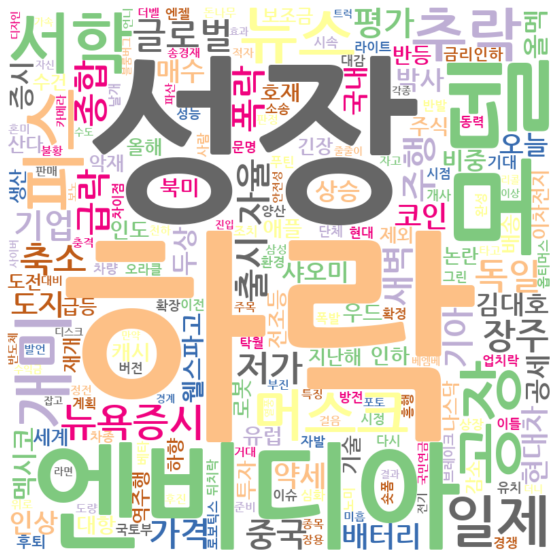

In [54]:
# 워드 클라우드 생성
font_path = 'C:/Windows/Fonts/'
font_name = 'NanumGothicBold.ttf'
word_cloud = WordCloud(font_path=font_path+font_name,
                       background_color='white',
                       colormap='Accent_r',
                       width=800, height=800,
                       ).generate_from_frequencies(word_count)

# 워드 클라우드 이미지로 출력
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 워드 클라우드 이미지로 저장
word_cloud.to_file(f'../data/{csv_name}_wordcloud.png')

## Selenium을 위한 동적 크롤링

In [1]:
# import the libraries
import time
import re
import random as rd
import pandas as pd
import numpy as np
import collections
from tqdm import tqdm
import pickle
import datetime

import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
user_agent = "Mozilla/5.0 (Linux; Android 9; SM-G975F) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.83 Mobile Safari/537.36"
headers = {
    "User-Agent": user_agent
}

def setWebdriver():
    service = ChromeService(executable_path=ChromeDriverManager().install())    # 크롬 드라이버 최신 버전 설정

    options = ChromeOptions()
    options.add_argument('user-agent=' + user_agent)
    options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
    #options.add_argument('headless') #headless모드 브라우저가 뜨지 않고 실행됩니다.
    #options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
    #options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
    #options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
    options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
    options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
    driver = webdriver.Chrome(service=service, options=options)

    return driver

In [3]:
def scrollDown(driver): # 스크롤 내리기
    end = driver.execute_script("return document.body.scrollHeight")
    while (True):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(rd.uniform(0.8, 1.2))
        new_end = driver.execute_script("return document.body.scrollHeight")
        if new_end == end:
            break
        end = new_end